In [2]:
# Packages and paths
# %%
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import geopandas as gp
import scipy.stats as sp
import sys
import zipfile
import fiona

# Add the path to the Utils folder
utils_path = os.path.abspath(os.path.join('..', 'Utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)

# Now you can import the functions from CustomFunctions.py
import CustomFunctions as cf

# Local paths
datapath = '../../Data'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'
shapepath = inputpath+'/Shapefiles'
figurepath = '../../Figures/Local/'


In [3]:
folder_path = inputpath+"/NHD/"

# Don't run this if files are already unzipped

# for file in os.listdir(folder_path):
#     if file.endswith(".zip"):
#         with zipfile.ZipFile(os.path.join(folder_path, file), 'r') as zip_ref:
#             zip_ref.extractall(folder_path)

# print("Files unzipped.")

In [4]:
# folder_path = "path_to_your_unzipped_files"
flowline_gdfs = []
point_gdfs = []
value_added_tables = []

for file in os.listdir(folder_path):
    if file.endswith(".gpkg"):
        filepath = os.path.join(folder_path, file)

        # Load specific layers
        flowlines = gp.read_file(filepath, layer="NHDFlowline")
        
        # If the value-added table is non-spatial, use pandas instead
        value_added = gp.read_file(filepath, layer="NHDPlusFlowlineVAA")  # Change to `pd.read_csv()` if needed

        flowline_gdfs.append(flowlines)
        value_added_tables.append(value_added)

# Merge the layers separately
merged_flowlines = gp.GeoDataFrame(pd.concat(flowline_gdfs, ignore_index=True))
merged_value_added = pd.concat(value_added_tables, ignore_index=True)  # Non-spatial data

# # Save to new files
# merged_flowlines.to_file("merged_flowlines.gpkg", driver="GPKG")
# merged_value_added.to_csv("merged_value_added_table.csv")  # Save as a CSV if non-spatial


/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D 

<Axes: >

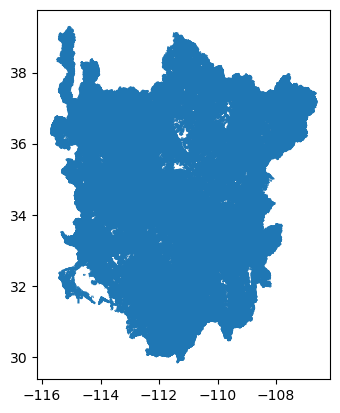

In [21]:
merged_flowlines.plot()

In [5]:
flowlines_VAA = pd.merge(merged_flowlines,merged_value_added,
                         suffixes=['_flowlines','_VAA'], how="inner",
                         on=['nhdplusid','reachcode'])
flowlines_VAA.head()

,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,vpuid_VAA,divergence_description,startflag_description,terminalfl_description,rtndiv_description,vpuin_description,vpuout_description,elevfixed_description,hwtype_description,statusflag_description
0,67120165,2021-11-30 00:00:00+00:00,2,00012758,Tse Bonito Wash,0.381769,15020006000324,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,No,Undefined,Add
1,67121173,2021-11-30 00:00:00+00:00,2,None,None,2.018803,15020006000758,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,No,Undefined,Add
2,67120427,2021-11-30 00:00:00+00:00,2,None,None,0.822904,15020006000759,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,No,Undefined,Add
3,67120097,2021-11-30 00:00:00+00:00,2,None,None,0.295969,15020006003256,1,None,460,...,1502,Feature is not part of a divergence,Yes,No,No,No,No,Yes,Real Headwater,Add
4,67120829,2021-11-30 00:00:00+00:00,2,None,None,0.605038,15020006003468,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,Yes,Undefined,Add


In [6]:
flowlines_VAA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1232056 entries, 0 to 1232055
Data columns (total 74 columns):
 #   Column                        Non-Null Count    Dtype              
---  ------                        --------------    -----              
 0   permanent_identifier          1232056 non-null  object             
 1   fdate                         1232056 non-null  datetime64[ms, UTC]
 2   resolution                    1232056 non-null  int32              
 3   gnis_id                       119190 non-null   object             
 4   gnis_name                     119193 non-null   object             
 5   lengthkm                      1232056 non-null  float64            
 6   reachcode                     1232056 non-null  object             
 7   flowdir                       1232056 non-null  int32              
 8   wbarea_permanent_identifier   110788 non-null   object             
 9   ftype                         1232056 non-null  int32              
 10

In [7]:
# I would like to now filter to only include a certain stream order
stream_order = 4
filtered_flowlines = flowlines_VAA[flowlines_VAA["streamorde"] > stream_order]

filtered_flowlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 86139 entries, 121 to 1232050
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   permanent_identifier          86139 non-null  object             
 1   fdate                         86139 non-null  datetime64[ms, UTC]
 2   resolution                    86139 non-null  int32              
 3   gnis_id                       48125 non-null  object             
 4   gnis_name                     48125 non-null  object             
 5   lengthkm                      86139 non-null  float64            
 6   reachcode                     86139 non-null  object             
 7   flowdir                       86139 non-null  int32              
 8   wbarea_permanent_identifier   23275 non-null  object             
 9   ftype                         86139 non-null  int32              
 10  fcode                      

<Axes: >

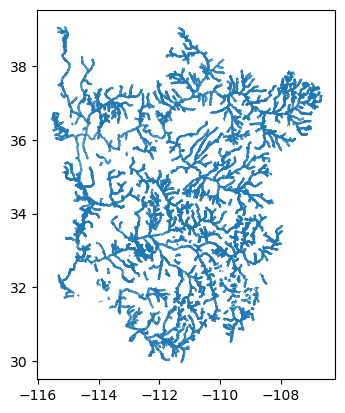

In [8]:
filtered_flowlines.plot()

In [9]:
filepath = shapepath+'/NHD_H_Arizona_State_Shape/Shape/WBDHU4.shp'
hucs = gp.read_file(filepath)
hucs.head()

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc4,name,shape_Leng,shape_Area,ObjectID,geometry
0,{A9EA1B74-C5FC-4CDE-9D94-6A7D24DBA363},{0798C084-7771-47E5-BD5C-F5CAF80EBC7A},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2021-06-16,None,13280094.00,53742.68,"AZ,CA,MX,NV",1503,Lower Colorado,NaN,NaN,1,"POLYGON ((-114.62325 36.0304, -114.62293 36.03..."
1,{ED349E01-8AF4-4F60-9FD8-959FEB62310C},{566E7651-2594-4C85-AE09-DB338B355F62},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2021-06-30,None,11508411.79,46572.93,"AZ,MX",1505,Middle Gila,NaN,NaN,2,"POLYGON ((-111.47785 33.48853, -111.47737 33.4..."
2,{6CD2178B-03B1-4D2D-9BC5-B1328A200221},{066D2059-B82D-4F33-9816-BD9B5523EB4B},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2021-10-28,None,8624187.76,34900.88,AZ,1506,Salt,NaN,NaN,3,"POLYGON ((-113.09819 35.86434, -113.09792 35.8..."
3,{E364E4BD-50C8-4AD2-93A0-EB813B735DB5},{0798C084-7771-47E5-BD5C-F5CAF80EBC7A},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2021-06-16,None,19373477.39,78401.75,"AZ,NV,UT",1501,Lower Colorado-Lake Mead,NaN,NaN,4,"POLYGON ((-115.0786 39.30054, -115.07836 39.29..."
4,{238D719A-43E5-473F-AB01-2EC0CDA6F168},None,None,None,None,2020-12-16,None,8714077.01,35264.65,"AZ,UT",1407,Upper Colorado-Dirty Devil,NaN,NaN,5,"POLYGON ((-111.47581 39.1245, -111.47546 39.12..."


In [10]:
# Check the crs
print(filtered_flowlines.crs)
print(hucs.crs)

EPSG:4269
EPSG:4269


In [11]:
# Join the databases
flowlines_hucs = gp.sjoin(filtered_flowlines, hucs, how="inner")
flowlines_hucs.info()

# Takes about 7 minutes and if it worked, the same number as non-null values before except now it has a huc4 column

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 86150 entries, 121 to 1232050
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   permanent_identifier          86150 non-null  object             
 1   fdate                         86150 non-null  datetime64[ms, UTC]
 2   resolution                    86150 non-null  int32              
 3   gnis_id                       48134 non-null  object             
 4   gnis_name                     48134 non-null  object             
 5   lengthkm                      86150 non-null  float64            
 6   reachcode                     86150 non-null  object             
 7   flowdir                       86150 non-null  int32              
 8   wbarea_permanent_identifier   23278 non-null  object             
 9   ftype                         86150 non-null  int32              
 10  fcode                      

In [12]:
flowlines_hucs.head()

,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,loaddate,referenceg,areaacres,areasqkm_right,states,huc4,name,shape_Leng,shape_Area,ObjectID
121,149136270,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.667937,15020005000065,1,None,460,...,2021-01-21,None,17316509.5,70077.49,"AZ,NM",1502,Little Colorado,NaN,NaN,6
123,149136272,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.605496,15020005000066,1,None,460,...,2021-01-21,None,17316509.5,70077.49,"AZ,NM",1502,Little Colorado,NaN,NaN,6
129,149136273,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.738941,15020005000067,1,None,460,...,2021-01-21,None,17316509.5,70077.49,"AZ,NM",1502,Little Colorado,NaN,NaN,6
148,149136329,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.268581,15020005000068,1,None,460,...,2021-01-21,None,17316509.5,70077.49,"AZ,NM",1502,Little Colorado,NaN,NaN,6
180,149133749,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.063574,15020005000064,1,None,460,...,2021-01-21,None,17316509.5,70077.49,"AZ,NM",1502,Little Colorado,NaN,NaN,6


So the Flowlines is ready to go, let's connect the point data (has streamgauge data) to the flowlines record with reach codes and drop the geometry of the point data.

This data will be located in a different folder because it was not in the high resolution dataset.

In [13]:
filepath = shapepath+'/NHD_H_Arizona_State_Shape/Shape/NHDPointEventFC.shp'
NHD_Point = gp.read_file(filepath)
NHD_Point.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   permanent_  4766 non-null   object        
 1   eventdate   4766 non-null   datetime64[ms]
 2   reachcode   4766 non-null   object        
 3   reachsmdat  4766 non-null   datetime64[ms]
 4   reachresol  4766 non-null   int32         
 5   feature_pe  404 non-null    object        
 6   featurecla  569 non-null    float64       
 7   source_ori  4766 non-null   object        
 8   source_dat  4685 non-null   object        
 9   source_fea  4766 non-null   object        
 10  featuredet  4435 non-null   object        
 11  measure     4766 non-null   float64       
 12  eventoffse  0 non-null      float64       
 13  eventtype   4766 non-null   int32         
 14  ObjectID    4766 non-null   int32         
 15  geometry    4766 non-null   geometry      
dtypes: datetime64[ms

The "source_fea" column has the USGS ID we need in order to connect it to the stream gauge data.

Also the reachcode is what connects all this to the flowlines.  So let's first merge the point data to the flowlines

In [18]:
flowlines_points = pd.merge(flowlines_hucs,NHD_Point,
                         suffixes=['_flowlines','_point'], how="left",
                         on=['reachcode'])
flowlines_points.head()

,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,featurecla,source_ori,source_dat,source_fea,featuredet,measure,eventoffse,eventtype,ObjectID_point,geometry_point
0,149136270,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.667937,15020005000065,1,None,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,149136272,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.605496,15020005000066,1,None,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,149136273,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.738941,15020005000067,1,None,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,149136329,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.268581,15020005000068,1,None,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,149133749,2021-12-06 00:00:00+00:00,2,00028511,Dodson Wash,0.063574,15020005000064,1,None,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [19]:
flowlines_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92012 entries, 0 to 92011
Columns: 105 entries, permanent_identifier to geometry_point
dtypes: datetime64[ms, UTC](1), datetime64[ms](3), float64(40), geometry(2), int16(13), int32(7), int64(1), object(38)
memory usage: 64.4+ MB


This is a monster database so maybe make it a little smaller

In [20]:
smaller_fldb = flowlines_points[['permanent_identifier', 'gnis_name','reachcode','streamorde','source_fea','huc4','name','geometry_flowlines']]
smaller_fldb

,permanent_identifier,gnis_name,reachcode,streamorde,source_fea,huc4,name,geometry_flowlines
0,149136270,Dodson Wash,15020005000065,5,NaN,1502,Little Colorado,"MULTILINESTRING Z ((-110.22189 34.34674 0, -11..."
1,149136272,Dodson Wash,15020005000066,5,NaN,1502,Little Colorado,"MULTILINESTRING Z ((-110.22271 34.33082 0, -11..."
2,149136273,Dodson Wash,15020005000067,5,NaN,1502,Little Colorado,"MULTILINESTRING Z ((-110.22282 34.32381 0, -11..."
3,149136329,Dodson Wash,15020005000068,5,NaN,1502,Little Colorado,"MULTILINESTRING Z ((-110.22374 34.32175 0, -11..."
4,149133749,Dodson Wash,15020005000064,5,NaN,1502,Little Colorado,"MULTILINESTRING Z ((-110.21985 34.36593 0, -11..."
...,...,...,...,...,...,...,...,...
92007,79196263,None,14070003000485,5,NaN,1407,Upper Colorado-Dirty Devil,"MULTILINESTRING Z ((-111.62334 38.30524 0, -11..."
92008,79196323,None,14070003000485,5,NaN,1407,Upper Colorado-Dirty Devil,"MULTILINESTRING Z ((-111.63217 38.30203 0, -11..."
92009,79196161,None,14070003002105,5,NaN,1407,Upper Colorado-Dirty Devil,"MULTILINESTRING Z ((-111.72004 38.30775 0, -11..."
92010,78979158,Upper Valley Creek,14070005000135,5,NaN,1407,Upper Colorado-Dirty Devil,"MULTILINESTRING Z ((-111.77497 37.72374 0, -11..."


In [21]:
smaller_fldb = smaller_fldb.rename(columns = {'geometry_flowlines':'geometry',
                                              'name':'huc_name',
                                              'source_fea':'ID'})

In [22]:
smaller_fldb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92012 entries, 0 to 92011
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   permanent_identifier  92012 non-null  object  
 1   gnis_name             53735 non-null  object  
 2   reachcode             92012 non-null  object  
 3   streamorde            92012 non-null  int16   
 4   ID                    10230 non-null  object  
 5   huc4                  92012 non-null  object  
 6   huc_name              92012 non-null  object  
 7   geometry              92012 non-null  geometry
dtypes: geometry(1), int16(1), object(6)
memory usage: 5.1+ MB


<Axes: >

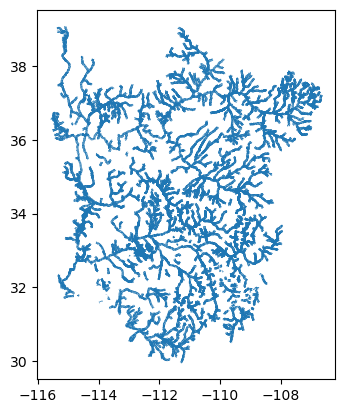

In [23]:
smaller_fldb.plot()

In [24]:
smaller_fldb.to_file(f'{outputpath}/flowlines_order4plus.shp')

/var/folders/7k/m9jgv50j0qv046r7xmwxt0qh0000gn/T/ipykernel_24167/2652305286.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  smaller_fldb.to_file(f'{outputpath}/flowlines_order4plus.shp')
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'permanent_identifier' to 'permanent_'
  ogr_write(
